<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center>Decision Tree and Random Forest Assignment Solution</center>

- Exploring publicly available data from __LendingClub.com__.

- Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.

  - Try to create a model that will help predict people who have a profile of having a __high probability of paying back__.

  - Lending club had a very interesting year in __2016__.
  
  - This data is from _before they even went public_.

- We are using lending data from __2007-2010__ to classify and predict whether or not the borrower paid back their loan in full.

<br> 
### Data Description

| Column Name   | Description                                               |
| :----------------- | :--------------------------------------------------: | 
| credit.policy     | 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. | 
| purpose           | The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other"). |  
| int.rate          | The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates. | 
| installment       | The monthly installments owed by the borrower if the loan is funded. |   
| log.annual.inc    | The natural log of the self-reported annual income of the borrower. |
| dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income). |
| fico              | The FICO credit score of the borrower. |
| days.with.cr.line | The number of days the borrower has had a credit line. |
| revol.bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). |
| revol.util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| inq.last.6mths    | The borrower's number of inquiries by creditors in the last 6 months. |
| delinq.2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years. |
| pub.rec           | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments). |

### Load the data

In [ ]:
import pandas as pd
loans = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check the columns present in dataset

In [ ]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Check the shape of dataset

In [ ]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check the info of the dataset

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Check Correlationcorrelation between features.

In [ ]:
loans.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


### Q 1. Write a code to check if there is any missing values present in the dataset.

In [ ]:
def tree():
    return loans.isnull().sum()
tree()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Data Visualisation

### Q 2. Plot a histogram of two FICO distribution on top of each other, one for each credit.policy

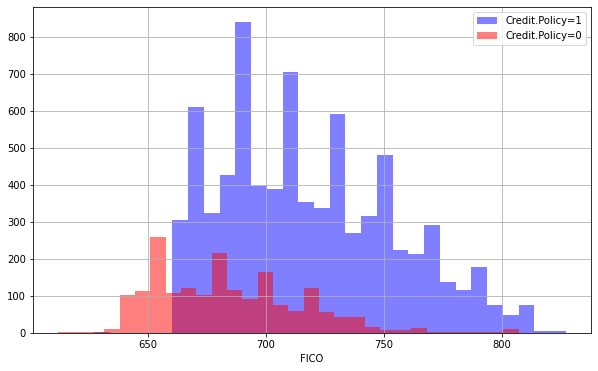

In [ ]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
    loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

### Q 3. Plot a histogram of two FICO distribution on top of each other, one for each not.fully.paid

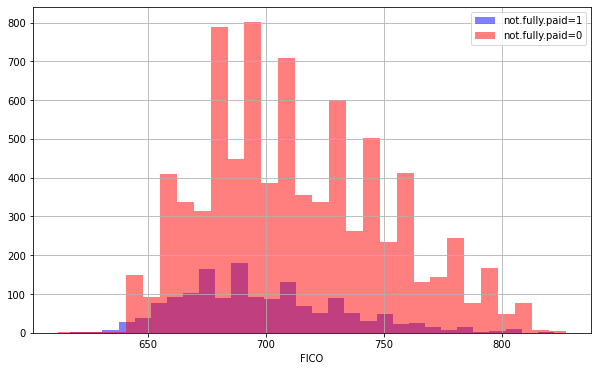

In [ ]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
    loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

### Q 4. Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


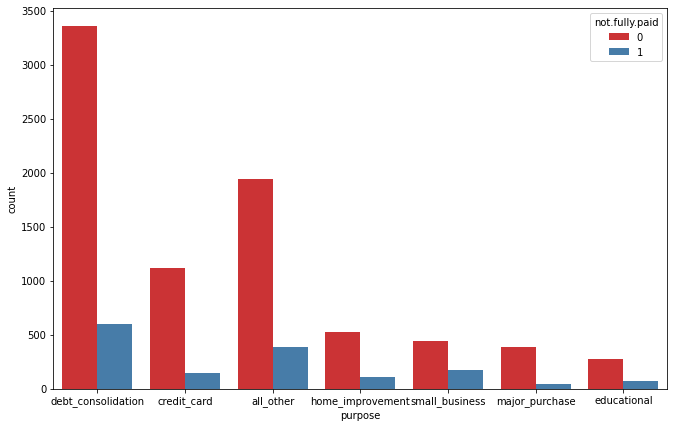

In [ ]:
import seaborn as sns
def tree():
    plt.figure(figsize=(11,7))
    sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
tree()

### Q. 5 Using a seaborn countplot understand the trend between FICO score and interest rate

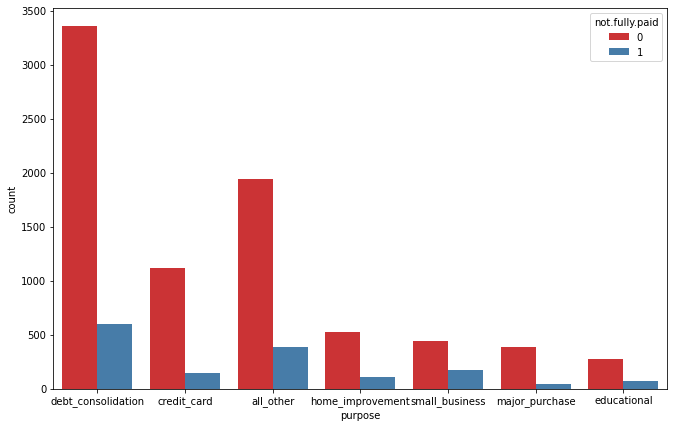

In [ ]:
import seaborn as sns
def tree():
    plt.figure(figsize=(11,7))
    sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
tree()

### Dealing with categorical variables.
``` ['purpose'] ```
- The purpose column is categorical.

- Transform it to dummy variables using `pd.get_dummies`.

In [ ]:
cat_feats = ['purpose']

### Q 6. Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [ ]:
final_data = pd.DataFrame()
def tree():
    final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
    return final_data
final_data = tree()

### Q 7. Extract the independent column to prepare X

In [ ]:
X = pd.DataFrame()
def tree():
    X = final_data.drop('not.fully.paid',axis=1)
    return X
X = tree()

### Q 8. Extract dependent column into a dataframe y for model prediction

In [ ]:
y = pd.DataFrame()
def tree():
    y = final_data.loc[:,final_data.columns == 'not.fully.paid']
    return y
y = tree()

### Q 9. Split X and y into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
def tree():
    return train_test_split(X, y, test_size=0.30, random_state=101)
X_train, X_test, y_train, y_test = tree()

### Check the shape of X and y of train dataset

In [ ]:
def tree():
    print(X_train.shape)
    print(y_train.shape)
tree()

(6704, 18)
(6704, 1)


### Check the shape of X and y of test dataset

In [ ]:
def tree():
    print(X_test.shape)
    print(y_test.shape)
tree()

(2874, 18)
(2874, 1)


### Q 10. Instantiate Decision Tree Classifier using scikit learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

### Q 11. Fit the model on X_train and y_train

In [ ]:
def tree():
    return dtree.fit(X_train,y_train)
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Q 12. Using the model for prediciton

In [ ]:
predictions = pd.DataFrame()
def tree():
    predictions = dtree.predict(X_test)
    return predictions
predictions = tree()

### Q 13. Model evaluation using Confusion matrix.

- A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

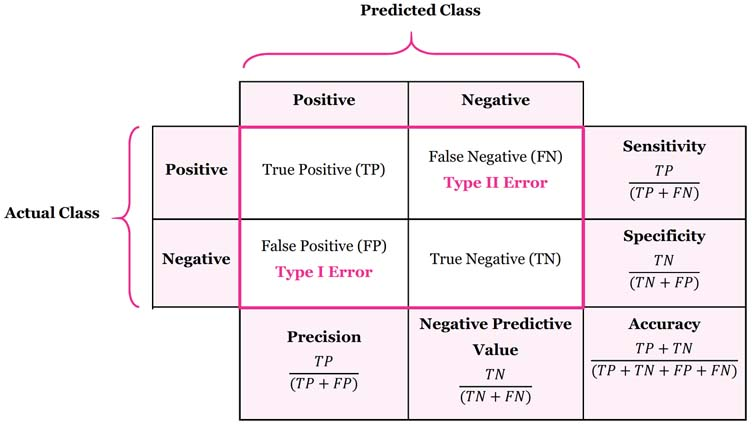

In [ ]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_test,predictions))
tree()

[[2000  431]
 [ 335  108]]


### Q 14. Model evaluation using recall score

In [ ]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_test,predictions)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.24379232505643342


### Q 15. Model evaluation using classification report.
- Please refer the link for Classification report documentation - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_test,predictions))
tree()

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



### Q 16. Instantiate Decision Tree Classifer using scikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).
- Please refer the link for DecisionTreeClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
def tree():
    dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()

### 16.1 Fit the model X_train and y_train

In [ ]:
def tree():
    return dtree1.fit(X_train,y_train)
tree()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 16.2 Use the model for prediction

In [ ]:
predictions_new = pd.DataFrame()
def tree():
    predictions_new = dtree1.predict(X_test)
    return predictions_new
predictions_new = tree()

### 16.3 Model evaluation using Confusion matrix

In [ ]:
def tree():
    print(confusion_matrix(y_test,predictions_new))
tree()

[[2428    3]
 [ 442    1]]


### 16.4 Model evaluation using recall score

In [ ]:
from sklearn.metrics import recall_score
def log():
    recall2 = recall_score(y_test,predictions_new)
    print('Recall score for test data is:', recall2)
    return recall2
recall2 = log()

Recall score for test data is: 0.002257336343115124


### 16.5 Model evaluation using classification report

In [ ]:
def tree():
    print(classification_report(y_test,predictions_new))
tree()

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.25      0.00      0.00       443

avg / total       0.75      0.85      0.78      2874



### Q 17. Write a code to find the difference between the recall score of 2 Decision Tree models created above (Give the absolute value).

In [ ]:
def log():
    difference = recall1 - recall2
    return difference
log()

0.23024830699774268

# Visualizing the Decision tree(Bonus)

### Using Sklearn interactive plot

In [ ]:
from sklearn.tree import plot_tree

[Text(128.30696449913975, 213.55714285714285, 'X[0] <= 0.5\ngini = 0.272\nsamples = 6704\nvalue = [5614, 1090]'),
 Text(59.93108115321112, 205.79142857142858, 'X[2] <= 349.935\ngini = 0.408\nsamples = 1317\nvalue = [941, 376]'),
 Text(46.02501245445229, 198.0257142857143, 'X[9] <= 6.5\ngini = 0.378\nsamples = 943\nvalue = [704, 239]'),
 Text(34.381976628330676, 190.26, 'X[1] <= 0.084\ngini = 0.36\nsamples = 815\nvalue = [623, 192]'),
 Text(33.97532666249146, 182.4942857142857, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(34.78862659416989, 182.4942857142857, 'X[17] <= 0.5\ngini = 0.368\nsamples = 789\nvalue = [597, 192]'),
 Text(22.456688396720565, 174.72857142857143, 'X[8] <= 50.95\ngini = 0.362\nsamples = 768\nvalue = [586, 182]'),
 Text(6.639831473468458, 166.96285714285713, 'X[8] <= 1.35\ngini = 0.313\nsamples = 329\nvalue = [265, 64]'),
 Text(2.8465497608745163, 159.19714285714286, 'X[4] <= 6.54\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(2.033249829196083, 151.43

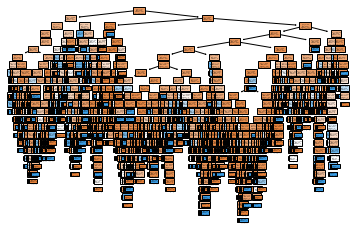

In [ ]:
plot_tree(dtree, filled=True)

The plot obtained is small because of the large number of data points present, you try visualizing the splits on smaller data sets

### Using text Representation

In [ ]:
from sklearn.tree import export_text

In [ ]:
text_representation = export_text(dtree)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 349.93
|   |   |--- feature_9 <= 6.50
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_8 <= 50.95
|   |   |   |   |   |   |--- feature_8 <= 1.35
|   |   |   |   |   |   |   |--- feature_4 <= 6.54
|   |   |   |   |   |   |   |   |--- feature_6 <= 1890.02
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.25
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.10
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  4.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  1890.02
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fea